<a href="https://colab.research.google.com/github/mukunthans/DeepLearningA1/blob/main/DLassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import wandb


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


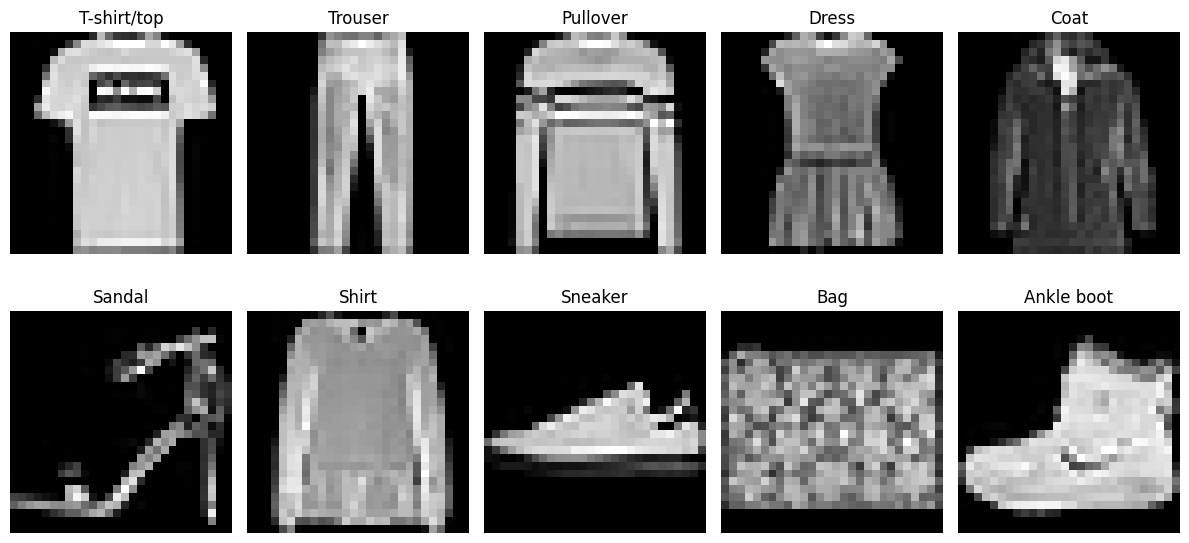

In [ ]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for class_idx in range(10):
    idx = np.where(y_train == class_idx)[0][0]
    image = x_train[idx]
    axes[class_idx].imshow(image, cmap='gray')
    axes[class_idx].set_title(class_names[class_idx])
    axes[class_idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs24m026 (cs24m026-iit-madras-foundation) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: cs24m026 (cs24m026-iit-madras-foundation) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


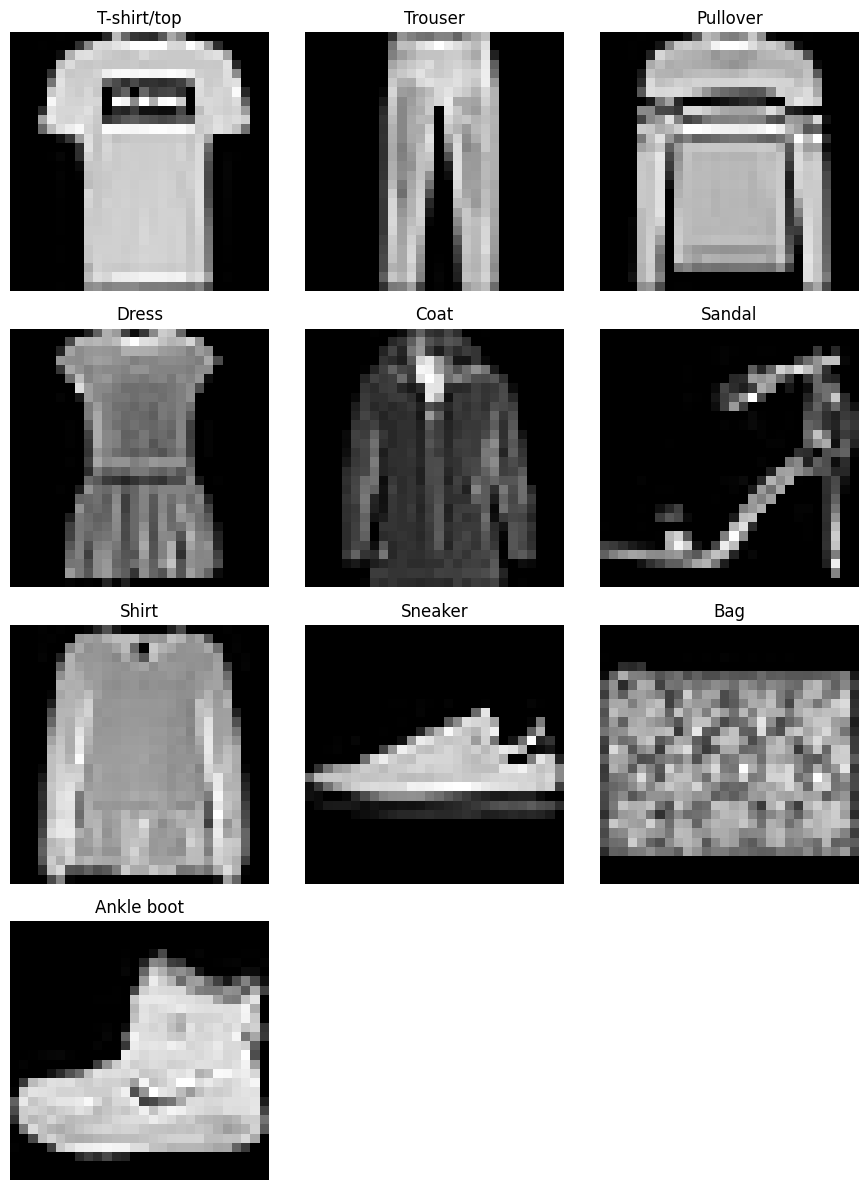

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Initialize wandb
wandb.init(project="fashion_mnist_visualization1", name="images")

# Create the figure with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(9, 12))  # Adjust figure size for better visualization
axes = axes.flatten()

for class_idx in range(10):
    idx = np.where(y_train == class_idx)[0][0]
    image = x_train[idx]
    axes[class_idx].imshow(image, cmap='gray')
    axes[class_idx].set_title(class_names[class_idx])
    axes[class_idx].axis('off')

# Remove empty subplots
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()

# Log the figure to wandb
wandb.log({"Fashion MNIST Samples": wandb.Image(fig)})

# Show the plot
plt.show()

# Finish wandb run
wandb.finish()


In [ ]:
import numpy as np

class ActivationFunctions:
    @staticmethod
    def identity(x):
        return x

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def get_derivative(a, activation):
        if activation == "sigmoid":
            return a * (1 - a)
        elif activation == "tanh":
            return 1 - a**2
        elif activation == "relu":
            return (a > 0).astype(int)
        else:  # Identity function derivative
            return np.ones_like(a)


In [ ]:
import numpy as np

class ActivationFunctions:
    functions = {
        "identity": lambda x: x,
        "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
        "tanh": np.tanh,
        "relu": lambda x: np.maximum(0, x)
    }

    derivatives = {
        "identity": lambda a: np.ones_like(a),
        "sigmoid": lambda a: a * (1 - a),
        "tanh": lambda a: 1 - a**2,
        "relu": lambda a: (a > 0).astype(int)
    }


In [ ]:
import numpy as np

class Feed_Forward:
    def __init__(self, hidden_units, num_hidden_layers, input_dim, output_dim,
                 weight_init="random", initialize=True):
        self.hidden_units = hidden_units
        self.num_hidden_layers = num_hidden_layers
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weight_init_type = weight_init

        if initialize:
            self.initialize_parameters()

    def initialize_parameters(self):
        layer_dims = [self.input_dim] + [self.hidden_units] * self.num_hidden_layers + [self.output_dim]
        self.weights = [np.random.randn(layer_dims[i], layer_dims[i+1]) for i in range(len(layer_dims) - 1)]
        self.biases = [np.zeros(layer_dims[i+1]) for i in range(len(layer_dims) - 1)]

        if self.weight_init_type.lower() == "xavier":
            self.weights = [w * np.sqrt(1 / w.shape[0]) for w in self.weights]

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict(self, x, activation_func):
        self.pre_activation, self.post_activation = [x], [x]

        for i in range(self.num_hidden_layers):
            x = activation_func(np.dot(x, self.weights[i]) + self.biases[i])
            self.pre_activation.append(x)
            self.post_activation.append(x)

        z = np.dot(x, self.weights[-1]) + self.biases[-1]
        self.pre_activation.append(z)

        a_out = self.softmax(z)
        self.post_activation.append(a_out)
        return a_out


In [ ]:
import numpy as np
from keras.datasets import mnist, fashion_mnist

def load_data(type, dataset='fashion_mnist'):
    x, y, x_test, y_test = None, None, None, None
    if dataset == 'mnist':
        (x, y), (x_test, y_test) = mnist.load_data()
    elif dataset == 'fashion_mnist':
        (x, y), (x_test, y_test) = fashion_mnist.load_data()

    if type == 'train':
        x = x.reshape(x.shape[0], 784) / 255.0
        y = np.eye(10)[y]
        return x, y
    elif type == 'test':
        x_test = x_test.reshape(x_test.shape[0], 784) / 255.0
        y_test = np.eye(10)[y_test]
        return x_test, y_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_train, y_train = load_data('train', dataset='fashion_mnist')
x_test, y_test = load_data('test', dataset='fashion_mnist')

input_dim = 784
output_dim = 10
hidden_units = 128
num_hidden_layers = 2

model = Feed_Forward(hidden_units, num_hidden_layers, input_dim, output_dim, weight_init="xavier")

y_pred_test = model.predict(x_test, activation_func=sigmoid)

accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy (Random Weights, Sigmoid Activation): {accuracy:.4f}")

print("Predicted Class Probabilities for First 5 Samples:")
for i in range(5):
    print(f"Sample {i+1}: {y_pred_test[i]}")


Test Accuracy (Random Weights, Sigmoid Activation): 0.1000
Predicted Class Probabilities for First 5 Samples:
Sample 1: [0.093222   0.0708664  0.08555487 0.27279964 0.0490331  0.05957783
 0.04412439 0.20058399 0.04734345 0.07689432]
Sample 2: [0.09368691 0.07293116 0.08865724 0.25500665 0.05225006 0.06322729
 0.04424069 0.20108995 0.04822328 0.08068676]
Sample 3: [0.09337297 0.07333568 0.08789618 0.25475613 0.05234195 0.06165409
 0.04368224 0.20952015 0.04697304 0.07646756]
Sample 4: [0.09481143 0.07354907 0.08742367 0.25902372 0.05156573 0.06172618
 0.0439738  0.20374225 0.04726118 0.07692298]
Sample 5: [0.09629005 0.07306703 0.08639375 0.26014479 0.05198671 0.06213949
 0.04346371 0.19950178 0.04677172 0.08024096]


In [ ]:
import numpy as np

class FeedForward:
    def __init__(self, hidden_units, num_hidden_layers, input_dim, output_dim, weight_init="random", initialize=True):
        self.hidden_units = hidden_units
        self.num_hidden_layers = num_hidden_layers
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weight_init_type = weight_init

        if initialize:
            self.initialize_parameters()

    def initialize_parameters(self):
        layer_dims = [self.input_dim] + [self.hidden_units] * self.num_hidden_layers + [self.output_dim]
        self.weights = [np.random.randn(layer_dims[i], layer_dims[i+1]) for i in range(len(layer_dims) - 1)]
        self.biases = [np.zeros(layer_dims[i+1]) for i in range(len(layer_dims) - 1)]

        if self.weight_init_type.lower() == "xavier":
            self.weights = [w * np.sqrt(1 / w.shape[0]) for w in self.weights]

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict(self, x, activation_func):
        self.pre_activation, self.post_activation = [x], [x]

        for i in range(self.num_hidden_layers):
            x = activation_func(np.dot(x, self.weights[i]) + self.biases[i])
            self.pre_activation.append(x)
            self.post_activation.append(x)

        z = np.dot(x, self.weights[-1]) + self.biases[-1]
        self.pre_activation.append(z)

        a_out = self.softmax(z)
        self.post_activation.append(a_out)
        return a_out

class ActivationFunctions:
    functions = {
        "identity": lambda x: x,
        "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
        "tanh": np.tanh,
        "relu": lambda x: np.maximum(0, x)
    }

    derivatives = {
        "identity": lambda a: np.ones_like(a),
        "sigmoid": lambda a: a * (1 - a),
        "tanh": lambda a: 1 - a**2,
        "relu": lambda a: (a > 0).astype(int)
    }

def get_activation_derivative(a, activation_name):
    return ActivationFunctions.derivatives[activation_name](a)

class Optimizer:
    def __init__(self, nn, lr, optimizer, momentum, epsilon, beta, beta1, beta2, t, decay):
        self.nn = nn
        self.lr = lr
        self.optimizer = optimizer
        self.momentum = momentum
        self.epsilon = epsilon
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.t = t
        self.decay = decay
        self.v_w = [np.zeros_like(w) for w in nn.weights]
        self.v_b = [np.zeros_like(b) for b in nn.biases]
        self.s_w = [np.zeros_like(w) for w in nn.weights]
        self.s_b = [np.zeros_like(b) for b in nn.biases]

    def SGD(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.nn.weights[i] -= self.lr * (d_weights[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (d_biases[i] + self.decay * self.nn.biases[i])

    def MomentumGD(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.momentum * self.v_w[i] + d_weights[i]
            self.v_b[i] = self.momentum * self.v_b[i] + d_biases[i]
            self.nn.weights[i] -= self.lr * (self.v_w[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (self.v_b[i] + self.decay * self.nn.biases[i])

    def NAG(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.momentum * self.v_w[i] + d_weights[i]
            self.v_b[i] = self.momentum * self.v_b[i] + d_biases[i]
            self.nn.weights[i] -= self.lr * (self.momentum * self.v_w[i] + d_weights[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (self.momentum * self.v_b[i] + d_biases[i] + self.decay * self.nn.biases[i])

    def RMSProp(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.s_w[i] = self.beta * self.s_w[i] + (1 - self.beta) * (d_weights[i] ** 2)
            self.s_b[i] = self.beta * self.s_b[i] + (1 - self.beta) * (d_biases[i] ** 2)
            self.nn.weights[i] -= self.lr * (d_weights[i] / (np.sqrt(self.s_w[i]) + self.epsilon) + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (d_biases[i] / (np.sqrt(self.s_b[i]) + self.epsilon) + self.decay * self.nn.biases[i])

    def Adam(self, d_weights, d_biases):
        self.t += 1
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.beta1 * self.v_w[i] + (1 - self.beta1) * d_weights[i]
            self.v_b[i] = self.beta1 * self.v_b[i] + (1 - self.beta1) * d_biases[i]
            self.s_w[i] = self.beta2 * self.s_w[i] + (1 - self.beta2) * (d_weights[i] ** 2)
            self.s_b[i] = self.beta2 * self.s_b[i] + (1 - self.beta2) * (d_biases[i] ** 2)
            v_w_hat = self.v_w[i] / (1 - self.beta1 ** self.t)
            v_b_hat = self.v_b[i] / (1 - self.beta1 ** self.t)
            s_w_hat = self.s_w[i] / (1 - self.beta2 ** self.t)
            s_b_hat = self.s_b[i] / (1 - self.beta2 ** self.t)
            self.nn.weights[i] -= self.lr * (v_w_hat / (np.sqrt(s_w_hat) + self.epsilon) + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (v_b_hat / (np.sqrt(s_b_hat) + self.epsilon) + self.decay * self.nn.biases[i])

    def optimize(self, d_weights, d_biases):
        opts = {"sgd": self.SGD, "momentum": self.MomentumGD, "nag": self.NAG, "rmsprop": self.RMSProp, "adam": self.Adam}
        opts[self.optimizer](d_weights, d_biases)



class NeuralNetworkTrainer:
    def __init__(self, nn, loss="cross_entropy", act_func="sigmoid", lr=0.001, optimizer="sgd", momentum=0.9, epsilon=1e-8, beta=0.9, beta1=0.9, beta2=0.999, t=0, decay=0):
        self.nn = nn
        self.loss = loss
        self.activation_function = act_func
        self.lr = lr
        self.optimizer = optimizer
        self.momentum = momentum
        self.epsilon = epsilon
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.t = t
        self.decay = decay
        self.optimizer_instance = Optimizer(nn, lr, optimizer, momentum, epsilon, beta, beta1, beta2, t, decay)
    def output_activation_derivative(self, y_pred):
        return np.diag(y_pred) - np.outer(y_pred, y_pred) if self.nn.output_activation_type == "softmax" else None
    def activation_derivative(self, a):
        return get_activation_derivative(a, self.activation_function)
    def backward(self, y, y_pred):
        d_weights, d_biases, d_h, d_a = [], [], [], []
        d_h.append(y_pred - y)
        d_a.append(np.array([np.matmul((y_pred[i] - y[i]), self.output_activation_derivative(y_pred[i])) for i in range(y_pred.shape[0])]))
        for i in range(self.nn.num_hidden_layers, 0, -1):
            d_weights.append(np.matmul(self.nn.post_activation[i].T, d_a[-1]))
            d_biases.append(np.sum(d_a[-1], axis=0))
            d_h.append(np.matmul(d_a[-1], self.nn.weights[i].T))
            d_a.append(d_h[-1] * self.activation_derivative(self.nn.post_activation[i]))
        d_weights.append(np.matmul(self.nn.post_activation[0].T, d_a[-1]))
        d_biases.append(np.sum(d_a[-1], axis=0))
        d_weights.reverse()
        d_biases.reverse()
        for i in range(len(d_weights)):
            d_weights[i] /= y.shape[0]
            d_biases[i] /= y.shape[0]
        return d_weights, d_biases
    def optimize(self, d_weights, d_biases):
        self.optimizer_instance.optimize(d_weights, d_biases)



In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist, mnist
import wandb

def loss_func(loss_type, y, y_pred):
    if loss_type == "cross_entropy":
        return -np.sum(y * np.log(y_pred + 1e-8))
    elif loss_type == "mean_squared_error":
        return np.sum((y - y_pred)**2) / 2
    else:
        raise Exception("Invalid loss function")

sweep_configuration = {
    'method': 'random',
    'name': 'fashion_mnist_sweep_squared_error',
    'metric': {
        'goal': 'maximize',
        'name': 'val_accuracy'
    },
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'neurons': {'values': [32, 64, 128]},
        'decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']},
        'momentum': {'values': [0.7, 0.8, 0.9]},
        'input_size': {'value': 784},
        'output_size': {'value': 10},
        'loss': {'value': 'mean_squared_error'},
        'beta': {'value': 0.9},
        'beta1': {'value': 0.9},
        'beta2': {'value': 0.999},
        'output_activation': {'value': 'softmax'},
        'epsilon': {'value': 1e-8},
        'dataset': {'value': 'fashion_mnist'}
    }
}

def load_data(type, dataset='fashion_mnist'):
    if dataset == 'mnist':
        (x, y), (x_test, y_test) = mnist.load_data()
    elif dataset == 'fashion_mnist':
        (x, y), (x_test, y_test) = fashion_mnist.load_data()
    if type == 'train':
        x = x.reshape(x.shape[0], 784) / 255.0
        y = np.eye(10)[y]
        return x, y
    elif type == 'test':
        x_test = x_test.reshape(x_test.shape[0], 784) / 255.0
        y_test = np.eye(10)[y_test]
        return x_test, y_test

class Feed_Forward:
    def __init__(self, hidden_units, num_hidden_layers, input_dim, output_dim, weight_init="random", output_activation="softmax", initialize=True):
        self.hidden_units = hidden_units
        self.num_hidden_layers = num_hidden_layers
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weight_init_type = weight_init
        self.output_activation_type = output_activation
        if initialize:
            self.initialize_parameters()
    def initialize_parameters(self):
        layer_dims = [self.input_dim] + [self.hidden_units] * self.num_hidden_layers + [self.output_dim]
        self.weights = [np.random.randn(layer_dims[i], layer_dims[i+1]) for i in range(len(layer_dims) - 1)]
        self.biases = [np.zeros(layer_dims[i+1]) for i in range(len(layer_dims) - 1)]
        if self.weight_init_type.lower() == "xavier":
            self.weights = [w * np.sqrt(1 / w.shape[0]) for w in self.weights]
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    def predict(self, x, activation_func):
        self.pre_activation, self.post_activation = [x], [x]
        for i in range(self.num_hidden_layers):
            x = activation_func(np.dot(x, self.weights[i]) + self.biases[i])
            self.pre_activation.append(x)
            self.post_activation.append(x)
        z = np.dot(x, self.weights[-1]) + self.biases[-1]
        self.pre_activation.append(z)
        a_out = self.softmax(z)
        self.post_activation.append(a_out)
        return a_out

class ActivationFunctions:
    functions = {
        "identity": lambda x: x,
        "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
        "tanh": np.tanh,
        "relu": lambda x: np.maximum(0, x)
    }
    derivatives = {
        "identity": lambda a: np.ones_like(a),
        "sigmoid": lambda a: a * (1 - a),
        "tanh": lambda a: 1 - a**2,
        "relu": lambda a: (a > 0).astype(int)
    }

def get_activation_derivative(a, activation_name):
    return ActivationFunctions.derivatives[activation_name](a)

class Optimizer:
    def __init__(self, nn, lr, optimizer, momentum, epsilon, beta, beta1, beta2, t, decay):
        self.nn = nn
        self.lr = lr
        self.optimizer = optimizer
        self.momentum = momentum
        self.epsilon = epsilon
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.t = t
        self.decay = decay
        self.v_w = [np.zeros_like(w) for w in nn.weights]
        self.v_b = [np.zeros_like(b) for b in nn.biases]
        self.s_w = [np.zeros_like(w) for w in nn.weights]
        self.s_b = [np.zeros_like(b) for b in nn.biases]
    def SGD(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.nn.weights[i] -= self.lr * (d_weights[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (d_biases[i] + self.decay * self.nn.biases[i])
    def MomentumGD(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.momentum * self.v_w[i] + d_weights[i]
            self.v_b[i] = self.momentum * self.v_b[i] + d_biases[i]
            self.nn.weights[i] -= self.lr * (self.v_w[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (self.v_b[i] + self.decay * self.nn.biases[i])
    def NAG(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.momentum * self.v_w[i] + d_weights[i]
            self.v_b[i] = self.momentum * self.v_b[i] + d_biases[i]
            self.nn.weights[i] -= self.lr * (self.momentum * self.v_w[i] + d_weights[i] + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (self.momentum * self.v_b[i] + d_biases[i] + self.decay * self.nn.biases[i])
    def RMSProp(self, d_weights, d_biases):
        for i in range(len(self.nn.weights)):
            self.s_w[i] = self.beta * self.s_w[i] + (1 - self.beta) * (d_weights[i] ** 2)
            self.s_b[i] = self.beta * self.s_b[i] + (1 - self.beta) * (d_biases[i] ** 2)
            self.nn.weights[i] -= self.lr * (d_weights[i] / (np.sqrt(self.s_w[i]) + self.epsilon) + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (d_biases[i] / (np.sqrt(self.s_b[i]) + self.epsilon) + self.decay * self.nn.biases[i])
    def Adam(self, d_weights, d_biases):
        self.t += 1
        for i in range(len(self.nn.weights)):
            self.v_w[i] = self.beta1 * self.v_w[i] + (1 - self.beta1) * d_weights[i]
            self.v_b[i] = self.beta1 * self.v_b[i] + (1 - self.beta1) * d_biases[i]
            self.s_w[i] = self.beta2 * self.s_w[i] + (1 - self.beta2) * (d_weights[i] ** 2)
            self.s_b[i] = self.beta2 * self.s_b[i] + (1 - self.beta2) * (d_biases[i] ** 2)
            v_w_hat = self.v_w[i] / (1 - self.beta1 ** self.t)
            v_b_hat = self.v_b[i] / (1 - self.beta1 ** self.t)
            s_w_hat = self.s_w[i] / (1 - self.beta2 ** self.t)
            s_b_hat = self.s_b[i] / (1 - self.beta2 ** self.t)
            self.nn.weights[i] -= self.lr * (v_w_hat / (np.sqrt(s_w_hat) + self.epsilon) + self.decay * self.nn.weights[i])
            self.nn.biases[i] -= self.lr * (v_b_hat / (np.sqrt(s_b_hat) + self.epsilon) + self.decay * self.nn.biases[i])
    def optimize(self, d_weights, d_biases):
        opt_key = self.optimizer
        if opt_key == "nesterov":
            opt_key = "nag"
        opts = {"sgd": self.SGD, "momentum": self.MomentumGD, "nag": self.NAG, "rmsprop": self.RMSProp, "adam": self.Adam}
        opts[opt_key](d_weights, d_biases)

class NeuralNetworkTrainer:
    def __init__(self, nn, loss="cross_entropy", act_func="sigmoid", lr=0.001, optimizer="sgd", momentum=0.9, epsilon=1e-8, beta=0.9, beta1=0.9, beta2=0.999, t=0, decay=0):
        self.nn = nn
        self.loss = loss
        self.activation_function = act_func
        self.lr = lr
        self.optimizer = optimizer
        self.momentum = momentum
        self.epsilon = epsilon
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.t = t
        self.decay = decay
        self.optimizer_instance = Optimizer(nn, lr, optimizer, momentum, epsilon, beta, beta1, beta2, t, decay)
    def output_activation_derivative(self, y_pred):
        return np.diag(y_pred) - np.outer(y_pred, y_pred) if self.nn.output_activation_type == "softmax" else None
    def activation_derivative(self, a):
        return get_activation_derivative(a, self.activation_function)
    def backward(self, y, y_pred):
        d_weights, d_biases, d_h, d_a = [], [], [], []
        d_h.append(y_pred - y)
        d_a.append(np.array([np.matmul((y_pred[i] - y[i]), self.output_activation_derivative(y_pred[i])) for i in range(y_pred.shape[0])]))
        for i in range(self.nn.num_hidden_layers, 0, -1):
            d_weights.append(np.matmul(self.nn.post_activation[i].T, d_a[-1]))
            d_biases.append(np.sum(d_a[-1], axis=0))
            d_h.append(np.matmul(d_a[-1], self.nn.weights[i].T))
            d_a.append(d_h[-1] * self.activation_derivative(self.nn.post_activation[i]))
        d_weights.append(np.matmul(self.nn.post_activation[0].T, d_a[-1]))
        d_biases.append(np.sum(d_a[-1], axis=0))
        d_weights.reverse()
        d_biases.reverse()
        for i in range(len(d_weights)):
            d_weights[i] /= y.shape[0]
            d_biases[i] /= y.shape[0]
        return d_weights, d_biases
    def optimize(self, d_weights, d_biases):
        self.optimizer_instance.optimize(d_weights, d_biases)

sigmoid = ActivationFunctions.functions["sigmoid"]
tanh = ActivationFunctions.functions["tanh"]
relu = ActivationFunctions.functions["relu"]

def train_sweep():
    run = wandb.init()
    parameters = wandb.config
    run.name = f"{parameters['activation']}_neurons={parameters['neurons']}_layers={parameters['hidden_layers']}_lr={parameters['learning_rate']}_batch={parameters['batch_size']}_opt={parameters['optimizer']}_mom={parameters['momentum']}_init={parameters['weight_init']}"
    x_train, y_train = load_data('train', dataset=parameters['dataset'])
    act_funcs = {'sigmoid': sigmoid, 'tanh': tanh, 'relu': relu}
    act_func = act_funcs[parameters['activation']]
    nn = Feed_Forward(hidden_units=parameters['neurons'],
                      num_hidden_layers=parameters['hidden_layers'],
                      input_dim=parameters['input_size'],
                      output_dim=parameters['output_size'],
                      weight_init=parameters['weight_init'],
                      output_activation=parameters['output_activation'],
                      initialize=True)
    trainer = NeuralNetworkTrainer(nn=nn,
                                   loss=parameters['loss'],
                                   act_func=parameters['activation'],
                                   lr=parameters['learning_rate'],
                                   optimizer=parameters['optimizer'],
                                   momentum=parameters['momentum'],
                                   epsilon=parameters['epsilon'],
                                   beta=parameters['beta'],
                                   beta1=parameters['beta1'],
                                   beta2=parameters['beta2'],
                                   t=0,
                                   decay=parameters['decay'])
    batch_size = parameters['batch_size']
    x_train_act, x_val, y_train_act, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
    print("Initial Accuracy: {}".format(np.sum(np.argmax(nn.predict(x_train, act_func), axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0]))
    for epoch in range(parameters['epochs']):
        for i in range(0, x_train_act.shape[0], batch_size):
            x_batch = x_train_act[i:i+batch_size]
            y_batch = y_train_act[i:i+batch_size]
            y_pred = nn.predict(x_batch, act_func)
            d_weights, d_biases = trainer.backward(y_batch, y_pred)
            trainer.optimize(d_weights, d_biases)
        trainer.optimizer_instance.t += 1
        y_pred_train = nn.predict(x_train_act, act_func)
        print("Epoch: {}, Loss: {}".format(epoch + 1, loss_func(parameters['loss'], y_train_act, y_pred_train)))
        print("Accuracy: {}".format(np.sum(np.argmax(y_pred_train, axis=1) == np.argmax(y_train_act, axis=1)) / y_train_act.shape[0]))
        train_loss = loss_func(parameters['loss'], y_train_act, y_pred_train)
        train_accuracy = np.sum(np.argmax(y_pred_train, axis=1) == np.argmax(y_train_act, axis=1)) / y_train_act.shape[0]
        y_pred_val = nn.predict(x_val, act_func)
        val_loss = loss_func(parameters['loss'], y_val, y_pred_val) / x_val.shape[0]
        val_accuracy = np.sum(np.argmax(y_pred_val, axis=1) == np.argmax(y_val, axis=1)) / y_val.shape[0]
        wandb.log({"epoch": epoch + 1, "train_loss": train_loss, "train_accuracy": train_accuracy, "val_loss": val_loss, "val_accuracy": val_accuracy})
    x_test, y_test = load_data('test', dataset=parameters['dataset'])
    y_pred_test = nn.predict(x_test, act_func)
    test_loss = loss_func(parameters['loss'], y_test, y_pred_test)
    test_accuracy = np.sum(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]
    print("Test Accuracy: {}".format(test_accuracy))
    wandb.log({"test_loss": test_loss, "test_accuracy": test_accuracy})
    return nn

wandb.login()
wandb_id = wandb.sweep(sweep_configuration, project="SWEEP_PROJECT01")
wandb.agent(wandb_id, function=train_sweep, count=50)
wandb.finish()


Create sweep with ID: u8j6hnoc
Sweep URL: https://wandb.ai/cs24m026-iit-madras-foundation/SWEEP_PROJECT01/sweeps/u8j6hnoc


wandb: Agent Starting Run: 2otxmtbm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 6372.942249348228
Accuracy: 0.8395185185185186
Epoch: 2, Loss: 5684.253851654077
Accuracy: 0.856
Epoch: 3, Loss: 5357.4096839369795
Accuracy: 0.8649629629629629
Epoch: 4, Loss: 5261.391241243021
Accuracy: 0.8683703703703703
Epoch: 5, Loss: 5042.349387714407
Accuracy: 0.8745555555555555
Test Accuracy: 0.8554


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▇▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8554
test_loss,1084.04788
train_accuracy,0.87456


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n9qn2xnp with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.10091666666666667
Epoch: 1, Loss: 24299.717731286448
Accuracy: 0.23875925925925925
Epoch: 2, Loss: 24299.998546031726
Accuracy: 0.10092592592592593
Epoch: 3, Loss: 24299.99920967197
Accuracy: 0.10092592592592593
Epoch: 4, Loss: 24299.999220066213
Accuracy: 0.10092592592592593
Epoch: 5, Loss: 24299.99922178217
Accuracy: 0.10092592592592593
Test Accuracy: 0.1


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,█▁▁▁▁
train_loss,▁████
val_accuracy,█▁▁▁▁
val_loss,▁████
epoch,5
test_accuracy,0.1
test_loss,4500.0
train_accuracy,0.10093


wandb: Agent Starting Run: rhy5h4y6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 23616.154115811627
Accuracy: 0.19492592592592592
Epoch: 2, Loss: 22286.195847627663
Accuracy: 0.24568518518518517
Epoch: 3, Loss: 20746.915369642917
Accuracy: 0.37555555555555553
Epoch: 4, Loss: 18949.959370999575
Accuracy: 0.486462962962963
Epoch: 5, Loss: 17266.783053383584
Accuracy: 0.5024259259259259
Epoch: 6, Loss: 13896.115060990012
Accuracy: 0.6522777777777777
Epoch: 7, Loss: 12168.378051191645
Accuracy: 0.6943703703703704
Epoch: 8, Loss: 11112.331113397215
Accuracy: 0.7084814814814815
Epoch: 9, Loss: 10428.801185414337
Accuracy: 0.7166666666666667
Epoch: 10, Loss: 9937.423925746558
Accuracy: 0.721925925925926
Test Accuracy: 0.7141


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▃▅▅▇████
train_loss,█▇▇▆▅▃▂▂▁▁
val_accuracy,▁▂▃▅▅▇████
val_loss,█▇▆▆▅▃▂▂▁▁
epoch,10
test_accuracy,0.7141
test_loss,1887.83167
train_accuracy,0.72193


wandb: Agent Starting Run: rra8ood9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.09998333333333333
Epoch: 1, Loss: 41297.26431331641
Accuracy: 0.10014814814814815
Epoch: 2, Loss: 38477.032847510534
Accuracy: 0.10011111111111111
Epoch: 3, Loss: 36189.004904199275
Accuracy: 0.09987037037037037
Epoch: 4, Loss: 34955.50378859119
Accuracy: 0.09862962962962964
Epoch: 5, Loss: 34350.91948012477
Accuracy: 0.09516666666666666
Epoch: 6, Loss: 33954.015914449075
Accuracy: 0.092
Epoch: 7, Loss: 33588.89884679472
Accuracy: 0.09162962962962963
Epoch: 8, Loss: 33199.08805803538
Accuracy: 0.09168518518518519
Epoch: 9, Loss: 32768.654511664274
Accuracy: 0.09407407407407407
Epoch: 10, Loss: 32295.270123284146
Accuracy: 0.09677777777777778
Test Accuracy: 0.0967


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,███▇▄▁▁▁▃▅
train_loss,█▆▄▃▃▂▂▂▁▁
val_accuracy,███▇▄▂▁▂▇▅
val_loss,█▆▄▃▃▂▂▂▁▁
epoch,10
test_accuracy,0.0967
test_loss,5981.67346
train_accuracy,0.09678


wandb: Agent Starting Run: 38rarunk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.10368333333333334
Epoch: 1, Loss: 14589.064055617884
Accuracy: 0.6536851851851851
Epoch: 2, Loss: 10588.897418204047
Accuracy: 0.7387777777777778
Epoch: 3, Loss: 8987.969018397796
Accuracy: 0.774074074074074
Epoch: 4, Loss: 8015.462556791958
Accuracy: 0.8033518518518519
Epoch: 5, Loss: 7382.6072346158135
Accuracy: 0.8173518518518519
Test Accuracy: 0.8062


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8062
test_loss,1425.73197
train_accuracy,0.81735


wandb: Agent Starting Run: 3xxhn35b with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.11343333333333333
Epoch: 1, Loss: 26770.189395332967
Accuracy: 0.2144074074074074
Epoch: 2, Loss: 25046.799539989395
Accuracy: 0.2556481481481481
Epoch: 3, Loss: 24023.305384971067
Accuracy: 0.2912037037037037
Epoch: 4, Loss: 23245.93729522571
Accuracy: 0.32101851851851854
Epoch: 5, Loss: 22589.080212686833
Accuracy: 0.34714814814814815
Test Accuracy: 0.3398


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃▅▇█
train_loss,█▅▃▂▁
val_accuracy,▁▃▅▆█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.3398
test_loss,4216.82203
train_accuracy,0.34715


wandb: Agent Starting Run: 8l0ljxfs with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 128
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.07915
Epoch: 1, Loss: 48645.75580847719
Accuracy: 0.0990925925925926
Epoch: 2, Loss: 37643.28996635074
Accuracy: 0.1771111111111111
Epoch: 3, Loss: 22362.813883698833
Accuracy: 0.45311111111111113
Epoch: 4, Loss: 24258.949354124623
Accuracy: 0.3495185185185185
Epoch: 5, Loss: 24299.3082394643
Accuracy: 0.19670370370370371
Epoch: 6, Loss: 24299.982498985206
Accuracy: 0.10092592592592593
Epoch: 7, Loss: 24299.994868376478
Accuracy: 0.10092592592592593
Epoch: 8, Loss: 24299.99573520602
Accuracy: 0.10092592592592593
Epoch: 9, Loss: 24299.996045003623
Accuracy: 0.10092592592592593
Epoch: 10, Loss: 24299.996173047763
Accuracy: 0.10092592592592593
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃█▆▃▁▁▁▁▁
train_loss,█▅▁▂▂▂▂▂▂▂
val_accuracy,▁▃█▆▃▁▁▁▁▁
val_loss,█▅▁▁▂▂▂▂▂▂
epoch,10
test_accuracy,0.1
test_loss,4500.00002
train_accuracy,0.10093


wandb: Agent Starting Run: oa4g219m with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 24300.27525867092
Accuracy: 0.09961111111111111
Epoch: 2, Loss: 24300.266925909
Accuracy: 0.09961111111111111
Epoch: 3, Loss: 24300.2675349565
Accuracy: 0.09961111111111111
Epoch: 4, Loss: 24300.267644094212
Accuracy: 0.09961111111111111
Epoch: 5, Loss: 24300.267664208943
Accuracy: 0.09961111111111111
Test Accuracy: 0.1


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,█▁▁▁▁
epoch,5
test_accuracy,0.1
test_loss,4500.03331
train_accuracy,0.09961


wandb: Agent Starting Run: ox7ym7bu with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 128
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.09998333333333333
Epoch: 1, Loss: 48365.76264200114
Accuracy: 0.09964814814814815
Epoch: 2, Loss: 48338.26420042887
Accuracy: 0.09964814814814815
Epoch: 3, Loss: 48302.372220501515
Accuracy: 0.09964814814814815
Epoch: 4, Loss: 48255.40816378057
Accuracy: 0.09964814814814815
Epoch: 5, Loss: 48193.557097327335
Accuracy: 0.09964814814814815
Test Accuracy: 0.1


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁
train_loss,█▇▅▄▁
val_accuracy,▁▁▁██
val_loss,█▇▅▃▁
epoch,5
test_accuracy,0.1
test_loss,8920.82561
train_accuracy,0.09965


wandb: Agent Starting Run: 46fdupt4 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.029583333333333333
Epoch: 1, Loss: 50867.57572959396
Accuracy: 0.05792592592592593
Epoch: 2, Loss: 50204.94037694652
Accuracy: 0.07016666666666667
Epoch: 3, Loss: 49976.768291571985
Accuracy: 0.0743888888888889
Epoch: 4, Loss: 49116.61348366961
Accuracy: 0.0902037037037037
Epoch: 5, Loss: 48763.770554636045
Accuracy: 0.09670370370370371
Epoch: 6, Loss: 48417.27939965216
Accuracy: 0.10294444444444445
Epoch: 7, Loss: 45555.462624944514
Accuracy: 0.1555925925925926
Epoch: 8, Loss: 43900.976648291246
Accuracy: 0.18603703703703703
Epoch: 9, Loss: 43376.638460994225
Accuracy: 0.19603703703703704
Epoch: 10, Loss: 43184.75730251589
Accuracy: 0.1982962962962963
Test Accuracy: 0.1986


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▂▃▃▃▆▇██
train_loss,█▇▇▆▆▆▃▂▁▁
val_accuracy,▁▂▂▃▃▃▆███
val_loss,█▇▇▆▆▆▃▂▁▁
epoch,10
test_accuracy,0.1986
test_loss,7993.44533
train_accuracy,0.1983


wandb: Agent Starting Run: hz7jpox2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 24635.081413562668
Accuracy: 0.0995
Epoch: 2, Loss: 24529.715930904287
Accuracy: 0.0995
Epoch: 3, Loss: 24460.359316240098
Accuracy: 0.0995
Epoch: 4, Loss: 24412.689261784264
Accuracy: 0.0995
Epoch: 5, Loss: 24379.2116316577
Accuracy: 0.0995
Epoch: 6, Loss: 24355.515834464863
Accuracy: 0.0995
Epoch: 7, Loss: 24338.741376421305
Accuracy: 0.0995
Epoch: 8, Loss: 24326.910669079152
Accuracy: 0.0995
Epoch: 9, Loss: 24318.610902344873
Accuracy: 0.0995
Epoch: 10, Loss: 24312.821076422286
Accuracy: 0.0997962962962963
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁▁▁▁▁█
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,█████████▁
val_loss,█▆▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.1
test_loss,4502.32279
train_accuracy,0.0998


wandb: Agent Starting Run: ma5mhxj6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.08543333333333333
Epoch: 1, Loss: 36342.67948398338
Accuracy: 0.0835
Epoch: 2, Loss: 33806.66021813899
Accuracy: 0.08998148148148148
Epoch: 3, Loss: 32457.97653428371
Accuracy: 0.096
Epoch: 4, Loss: 31566.910474159
Accuracy: 0.0995
Epoch: 5, Loss: 30815.389294061577
Accuracy: 0.10031481481481481
Test Accuracy: 0.0962


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆██
train_loss,█▅▃▂▁
val_accuracy,▁▄▆██
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.0962
test_loss,5717.22262
train_accuracy,0.10031


wandb: Agent Starting Run: 8k6pa33n with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.05115
Epoch: 1, Loss: 7181.416795478176
Accuracy: 0.8173518518518519
Epoch: 2, Loss: 5630.324695995748
Accuracy: 0.8578333333333333
Epoch: 3, Loss: 5093.392837620529
Accuracy: 0.8724444444444445
Epoch: 4, Loss: 4969.158406309916
Accuracy: 0.8754074074074074
Epoch: 5, Loss: 4813.373832240446
Accuracy: 0.881
Test Accuracy: 0.8557


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▇▇██
val_loss,█▃▁▁▁
epoch,5
test_accuracy,0.8557
test_loss,1080.26378
train_accuracy,0.881


wandb: Agent Starting Run: ogyisisx with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.11488333333333334
Epoch: 1, Loss: 47222.82842413351
Accuracy: 0.1254074074074074
Epoch: 2, Loss: 46327.54946051304
Accuracy: 0.142
Epoch: 3, Loss: 45627.75184505718
Accuracy: 0.15494444444444444
Epoch: 4, Loss: 45356.87847332
Accuracy: 0.16
Epoch: 5, Loss: 45206.23227319556
Accuracy: 0.1627962962962963
Test Accuracy: 0.1627


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▇▇█
train_loss,█▅▂▂▁
val_accuracy,▁▄▇██
val_loss,█▅▂▁▁
epoch,5
test_accuracy,0.1627
test_loss,8372.62217
train_accuracy,0.1628


wandb: Agent Starting Run: qbxjqcy3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 64
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.0701
Epoch: 1, Loss: 20001.986323389137
Accuracy: 0.49748148148148147
Epoch: 2, Loss: 15131.092392368488
Accuracy: 0.6471851851851852
Epoch: 3, Loss: 12444.290188108891
Accuracy: 0.6797037037037037
Epoch: 4, Loss: 10952.316592379142
Accuracy: 0.7278518518518519
Epoch: 5, Loss: 9834.601861775374
Accuracy: 0.7603703703703704
Test Accuracy: 0.7484


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.7484
test_loss,1860.00713
train_accuracy,0.76037


wandb: Agent Starting Run: uzxo5u54 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.08005
Epoch: 1, Loss: 43467.739114765274
Accuracy: 0.124
Epoch: 2, Loss: 41015.427853349116
Accuracy: 0.17251851851851852
Epoch: 3, Loss: 38377.9869450118
Accuracy: 0.22342592592592592
Epoch: 4, Loss: 35732.53465321709
Accuracy: 0.27705555555555555
Epoch: 5, Loss: 33306.59110327037
Accuracy: 0.32696296296296296
Epoch: 6, Loss: 31809.214025621648
Accuracy: 0.3590740740740741
Epoch: 7, Loss: 30708.305905462716
Accuracy: 0.38075925925925924
Epoch: 8, Loss: 29657.469376904497
Accuracy: 0.3977222222222222
Epoch: 9, Loss: 27719.684422677612
Accuracy: 0.4240185185185185
Epoch: 10, Loss: 25609.3031246917
Accuracy: 0.46061111111111114
Test Accuracy: 0.4404


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▃▄▅▆▆▇▇█
train_loss,█▇▆▅▄▃▃▃▂▁
val_accuracy,▁▂▃▄▅▆▆▆▇█
val_loss,█▇▆▅▄▄▃▃▂▁
epoch,10
test_accuracy,0.4404
test_loss,4931.96443
train_accuracy,0.46061


wandb: Agent Starting Run: ynlpp8tc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.12215
Epoch: 1, Loss: 26689.67961429648
Accuracy: 0.1452037037037037
Epoch: 2, Loss: 25996.181605131278
Accuracy: 0.16083333333333333
Epoch: 3, Loss: 25713.636621543716
Accuracy: 0.16753703703703704
Epoch: 4, Loss: 25511.192560852644
Accuracy: 0.16140740740740742
Epoch: 5, Loss: 25351.95285447123
Accuracy: 0.15237037037037038
Test Accuracy: 0.1495


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆█▆▃
train_loss,█▄▃▂▁
val_accuracy,▁▅█▆▃
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.1495
test_loss,4694.7793
train_accuracy,0.15237


wandb: Agent Starting Run: wty5a3b7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.14178333333333334
Epoch: 1, Loss: 36570.494028038345
Accuracy: 0.2227222222222222
Epoch: 2, Loss: 31906.022179989202
Accuracy: 0.30896296296296294
Epoch: 3, Loss: 29024.8464732369
Accuracy: 0.36594444444444446
Epoch: 4, Loss: 25896.750931713123
Accuracy: 0.4273148148148148
Epoch: 5, Loss: 22734.21143432931
Accuracy: 0.4805740740740741
Test Accuracy: 0.4631


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃▅▇█
train_loss,█▆▄▃▁
val_accuracy,▁▄▅▇█
val_loss,█▆▄▂▁
epoch,5
test_accuracy,0.4631
test_loss,4346.72591
train_accuracy,0.48057


wandb: Agent Starting Run: 32emwjm0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.09541666666666666
Epoch: 1, Loss: 17345.905498129203
Accuracy: 0.5316296296296297
Epoch: 2, Loss: 12881.186528648908
Accuracy: 0.662425925925926
Epoch: 3, Loss: 10856.282541542241
Accuracy: 0.7112037037037037
Epoch: 4, Loss: 9918.930925780714
Accuracy: 0.7374259259259259
Epoch: 5, Loss: 9339.419773449665
Accuracy: 0.7528888888888889
Test Accuracy: 0.7422


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇██
train_loss,█▄▂▂▁
val_accuracy,▁▅▇▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.7422
test_loss,1804.026
train_accuracy,0.75289


wandb: Agent Starting Run: 2aszdncm with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.06713333333333334
Epoch: 1, Loss: 24271.159011790955
Accuracy: 0.09625925925925925
Epoch: 2, Loss: 24263.35545375106
Accuracy: 0.11957407407407407
Epoch: 3, Loss: 24268.300095765288
Accuracy: 0.14881481481481482
Epoch: 4, Loss: 24275.59431455489
Accuracy: 0.20142592592592592
Epoch: 5, Loss: 24282.213675331695
Accuracy: 0.27285185185185185
Epoch: 6, Loss: 24287.545721037335
Accuracy: 0.3186481481481481
Epoch: 7, Loss: 24291.564802508867
Accuracy: 0.3364259259259259
Epoch: 8, Loss: 24294.42772862097
Accuracy: 0.32725925925925925
Epoch: 9, Loss: 24296.369023749536
Accuracy: 0.2805185185185185
Epoch: 10, Loss: 24297.655734016567
Accuracy: 0.20514814814814814
Test Accuracy: 0.2033


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▃▄▆▇██▆▄
train_loss,▃▁▂▃▅▆▇▇██
val_accuracy,▁▂▃▄▆▇██▆▄
val_loss,▂▁▂▄▅▆▇▇██
epoch,10
test_accuracy,0.2033
test_loss,4499.56858
train_accuracy,0.20515


wandb: Agent Starting Run: z7yqt7ck with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 128
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.08933333333333333
Epoch: 1, Loss: 41164.85261004039
Accuracy: 0.16983333333333334
Epoch: 2, Loss: 36900.46661791171
Accuracy: 0.2579444444444444
Epoch: 3, Loss: 34479.66742339945
Accuracy: 0.3075555555555556
Epoch: 4, Loss: 32398.798305986646
Accuracy: 0.3485185185185185
Epoch: 5, Loss: 30866.39566579852
Accuracy: 0.3812407407407407
Epoch: 6, Loss: 29988.745571471973
Accuracy: 0.39935185185185185
Epoch: 7, Loss: 29074.474728698915
Accuracy: 0.4177037037037037
Epoch: 8, Loss: 28401.049427343107
Accuracy: 0.43214814814814817
Epoch: 9, Loss: 27285.30005162305
Accuracy: 0.4521851851851852
Epoch: 10, Loss: 25979.32848697713
Accuracy: 0.4764074074074074
Test Accuracy: 0.4627


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃▄▅▆▆▇▇▇█
train_loss,█▆▅▄▃▃▂▂▂▁
val_accuracy,▁▃▄▅▆▆▇▇▇█
val_loss,█▆▅▄▃▃▂▂▂▁
epoch,10
test_accuracy,0.4627
test_loss,4952.18584
train_accuracy,0.47641


wandb: Agent Starting Run: y2xs9e4h with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 64
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.12131666666666667
Epoch: 1, Loss: 40881.616277902074
Accuracy: 0.13587037037037036
Epoch: 2, Loss: 40176.300829677755
Accuracy: 0.14816666666666667
Epoch: 3, Loss: 39458.94633309329
Accuracy: 0.16131481481481483
Epoch: 4, Loss: 38708.388934183444
Accuracy: 0.17527777777777778
Epoch: 5, Loss: 37920.66137236
Accuracy: 0.19053703703703703
Epoch: 6, Loss: 37065.399813535914
Accuracy: 0.20622222222222222
Epoch: 7, Loss: 36261.727558784696
Accuracy: 0.22224074074074074
Epoch: 8, Loss: 35547.53692166287
Accuracy: 0.23685185185185184
Epoch: 9, Loss: 34974.69300144127
Accuracy: 0.24866666666666667
Epoch: 10, Loss: 34299.35717811683
Accuracy: 0.26216666666666666
Test Accuracy: 0.257


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▂▃▄▅▆▇▇█
train_loss,█▇▆▆▅▄▃▂▂▁
val_accuracy,▁▂▃▃▄▅▆▇▇█
val_loss,█▇▆▆▅▄▃▂▂▁
epoch,10
test_accuracy,0.257
test_loss,6398.25704
train_accuracy,0.26217


wandb: Agent Starting Run: 3xzan2iw with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.06665
Epoch: 1, Loss: 16898.6462480162
Accuracy: 0.5706296296296296
Epoch: 2, Loss: 12912.152915501334
Accuracy: 0.6666851851851852
Epoch: 3, Loss: 10921.719538464016
Accuracy: 0.7279629629629629
Epoch: 4, Loss: 9523.807602202993
Accuracy: 0.7747222222222222
Epoch: 5, Loss: 8445.605425506614
Accuracy: 0.8027037037037037
Epoch: 6, Loss: 7722.505073768419
Accuracy: 0.8165925925925926
Epoch: 7, Loss: 7242.104426820705
Accuracy: 0.8248333333333333
Epoch: 8, Loss: 6907.907406058366
Accuracy: 0.8312407407407407
Epoch: 9, Loss: 6660.861250621191
Accuracy: 0.8353518518518519
Epoch: 10, Loss: 6467.848496571499
Accuracy: 0.8391481481481482
Test Accuracy: 0.8245


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▇▇████
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8245
test_loss,1274.39562
train_accuracy,0.83915


wandb: Agent Starting Run: 2znfeyt5 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 10563.360424523358
Accuracy: 0.7499074074074074
Epoch: 2, Loss: 8213.894588986379
Accuracy: 0.7950925925925926
Epoch: 3, Loss: 7313.013155042744
Accuracy: 0.8235370370370371
Epoch: 4, Loss: 6932.54616317206
Accuracy: 0.832925925925926
Epoch: 5, Loss: 6740.838315913685
Accuracy: 0.8383518518518519
Epoch: 6, Loss: 6621.415378429125
Accuracy: 0.8417962962962963
Epoch: 7, Loss: 6538.090092023118
Accuracy: 0.8442407407407407
Epoch: 8, Loss: 6476.05850709067
Accuracy: 0.8462592592592593
Epoch: 9, Loss: 6427.678198868003
Accuracy: 0.8478333333333333
Epoch: 10, Loss: 6388.75447003585
Accuracy: 0.8491481481481481
Test Accuracy: 0.8346


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇▇▇████
train_loss,█▄▃▂▂▁▁▁▁▁
val_accuracy,▁▄▆▇▇█████
val_loss,█▄▂▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8346
test_loss,1266.96503
train_accuracy,0.84915


wandb: Agent Starting Run: glwnnmgt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.1
Epoch: 1, Loss: 8329.410465000787
Accuracy: 0.7791851851851852
Epoch: 2, Loss: 7001.973947261317
Accuracy: 0.8178703703703704
Epoch: 3, Loss: 6439.764351212033
Accuracy: 0.8324074074074074
Epoch: 4, Loss: 6087.683202768032
Accuracy: 0.843462962962963
Epoch: 5, Loss: 5840.442718391067
Accuracy: 0.8502037037037037
Test Accuracy: 0.8301


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8301
test_loss,1218.98662
train_accuracy,0.8502


wandb: Agent Starting Run: eah936hy with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 64
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.18966666666666668
Epoch: 1, Loss: 43987.73287879376
Accuracy: 0.18301851851851852
Epoch: 2, Loss: 7600.849543815894
Accuracy: 0.8050555555555555
Epoch: 3, Loss: 6202.869254788089
Accuracy: 0.8488148148148148
Epoch: 4, Loss: 5634.639713129007
Accuracy: 0.8623703703703703
Epoch: 5, Loss: 5571.599761510603
Accuracy: 0.8620925925925926
Epoch: 6, Loss: 5501.913519406418
Accuracy: 0.862
Epoch: 7, Loss: 5228.975927478044
Accuracy: 0.8683888888888889
Epoch: 8, Loss: 5238.364739836222
Accuracy: 0.8701296296296296
Epoch: 9, Loss: 5217.139470145726
Accuracy: 0.870462962962963
Epoch: 10, Loss: 5316.349183542404
Accuracy: 0.8677037037037038
Test Accuracy: 0.8508


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇████████
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▇████████
val_loss,█▁▁▁▁▁▁▁▁▁
epoch,10
test_accuracy,0.8508
test_loss,1096.11402
train_accuracy,0.8677


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kg64z6rg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.1
Epoch: 1, Loss: 7325.3483243440805
Accuracy: 0.8083333333333333
Epoch: 2, Loss: 6329.185737248108
Accuracy: 0.8378888888888889
Epoch: 3, Loss: 5748.047964270079
Accuracy: 0.8532777777777778
Epoch: 4, Loss: 5445.101986641659
Accuracy: 0.8617592592592592
Epoch: 5, Loss: 5175.740506179669
Accuracy: 0.8692777777777778
Test Accuracy: 0.8362


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8362
test_loss,1174.84041
train_accuracy,0.86928


wandb: Agent Starting Run: 9f0m5j8r with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 25042.793942597356
Accuracy: 0.10018518518518518
Epoch: 2, Loss: 24878.27510589534
Accuracy: 0.10018518518518518
Epoch: 3, Loss: 24767.57930573204
Accuracy: 0.10018518518518518
Epoch: 4, Loss: 24686.111382780193
Accuracy: 0.10018518518518518
Epoch: 5, Loss: 24623.02424156071
Accuracy: 0.10018518518518518
Epoch: 6, Loss: 24572.628371725437
Accuracy: 0.10018518518518518
Epoch: 7, Loss: 24531.53451257332
Accuracy: 0.10018518518518518
Epoch: 8, Loss: 24497.530447881665
Accuracy: 0.10018518518518518
Epoch: 9, Loss: 24469.07675385655
Accuracy: 0.10018518518518518
Epoch: 10, Loss: 24445.05368027141
Accuracy: 0.10018518518518518
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▅▄▃▂▂▂▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▄▃▃▂▂▁▁
epoch,10
test_accuracy,0.1
test_loss,4527.20331
train_accuracy,0.10019


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qr1q73em with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 128
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 7061.10493433607
Accuracy: 0.8183148148148148
Epoch: 2, Loss: 6155.963344462608
Accuracy: 0.8450185185185185
Epoch: 3, Loss: 5740.200757112835
Accuracy: 0.8574814814814815
Epoch: 4, Loss: 5533.617699785675
Accuracy: 0.8625925925925926
Epoch: 5, Loss: 5303.04758423543
Accuracy: 0.8685925925925926
Epoch: 6, Loss: 5220.66707960272
Accuracy: 0.8709259259259259
Epoch: 7, Loss: 5370.7143660840275
Accuracy: 0.8680925925925926
Epoch: 8, Loss: 5445.489319878439
Accuracy: 0.8669629629629629
Epoch: 9, Loss: 5027.22911471617
Accuracy: 0.8776111111111111
Epoch: 10, Loss: 4680.493573547084
Accuracy: 0.8857777777777778
Test Accuracy: 0.8612


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▆▆▆▇█
train_loss,█▅▄▄▃▃▃▃▂▁
val_accuracy,▁▄▅▆▆▇▆▆▇█
val_loss,█▅▃▃▂▂▃▃▂▁
epoch,10
test_accuracy,0.8612
test_loss,1068.75289
train_accuracy,0.88578


wandb: Agent Starting Run: l456lue4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.09411666666666667
Epoch: 1, Loss: 33416.49534538511
Accuracy: 0.22755555555555557
Epoch: 2, Loss: 13018.807958049807
Accuracy: 0.6585555555555556
Epoch: 3, Loss: 17522.9720228184
Accuracy: 0.6611666666666667
Epoch: 4, Loss: 24047.220174336828
Accuracy: 0.3721851851851852
Epoch: 5, Loss: 24297.987310819517
Accuracy: 0.20042592592592592
Epoch: 6, Loss: 24299.973143320152
Accuracy: 0.10092592592592593
Epoch: 7, Loss: 24299.990175807285
Accuracy: 0.10092592592592593
Epoch: 8, Loss: 24299.992842292668
Accuracy: 0.10092592592592593
Epoch: 9, Loss: 24299.993982848406
Accuracy: 0.10092592592592593
Epoch: 10, Loss: 24299.994448939593
Accuracy: 0.10092592592592593
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▃██▄▂▁▁▁▁▁
train_loss,█▁▃▅▅▅▅▅▅▅
val_accuracy,▂██▄▂▁▁▁▁▁
val_loss,█▁▂▅▅▅▅▅▅▅
epoch,10
test_accuracy,0.1
test_loss,4500.00005
train_accuracy,0.10093


wandb: Agent Starting Run: 2uaxkgh5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.0748
Epoch: 1, Loss: 48606.563330666286
Accuracy: 0.09961111111111111
Epoch: 2, Loss: 48751.90509552617
Accuracy: 0.09696296296296296
Epoch: 3, Loss: 49286.53670082216
Accuracy: 0.08687037037037038
Epoch: 4, Loss: 44100.173669655036
Accuracy: 0.18318518518518517
Epoch: 5, Loss: 42617.97250493086
Accuracy: 0.2106111111111111
Epoch: 6, Loss: 41438.176313220436
Accuracy: 0.2324074074074074
Epoch: 7, Loss: 40957.52576181657
Accuracy: 0.24138888888888888
Epoch: 8, Loss: 41046.445774549225
Accuracy: 0.23972222222222223
Epoch: 9, Loss: 40731.40375305748
Accuracy: 0.2456111111111111
Epoch: 10, Loss: 39965.06994183744
Accuracy: 0.2597037037037037
Test Accuracy: 0.2574


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▂▁▁▅▆▇▇▇▇█
train_loss,▇██▄▃▂▂▂▂▁
val_accuracy,▁▁▁▅▆▇▇▇▇█
val_loss,███▄▃▂▂▂▂▁
epoch,10
test_accuracy,0.2574
test_loss,7424.41051
train_accuracy,0.2597


wandb: Agent Starting Run: 508kyazm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.10463333333333333
Epoch: 1, Loss: 28352.592063993703
Accuracy: 0.285462962962963
Epoch: 2, Loss: 22313.37891800963
Accuracy: 0.4310185185185185
Epoch: 3, Loss: 19310.885759375924
Accuracy: 0.5068333333333334
Epoch: 4, Loss: 17715.85057098835
Accuracy: 0.543037037037037
Epoch: 5, Loss: 16568.032396626782
Accuracy: 0.5687592592592593
Epoch: 6, Loss: 15522.405300037484
Accuracy: 0.5963148148148149
Epoch: 7, Loss: 14835.371237115602
Accuracy: 0.6103148148148149
Epoch: 8, Loss: 14279.569401877656
Accuracy: 0.6241296296296296
Epoch: 9, Loss: 13821.075553069655
Accuracy: 0.637425925925926
Epoch: 10, Loss: 13384.897037379476
Accuracy: 0.6464814814814814
Test Accuracy: 0.6225


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.6225
test_loss,2616.94631
train_accuracy,0.64648


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ylao9w2b with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.0891
Epoch: 1, Loss: 41447.32461191927
Accuracy: 0.08948148148148148
Epoch: 2, Loss: 41360.7153406616
Accuracy: 0.08992592592592592
Epoch: 3, Loss: 41273.20913724998
Accuracy: 0.09085185185185185
Epoch: 4, Loss: 41185.98230663511
Accuracy: 0.09116666666666666
Epoch: 5, Loss: 41098.88360071266
Accuracy: 0.0917037037037037
Test Accuracy: 0.0947


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▅▆█
train_loss,█▆▅▃▁
val_accuracy,▁▁▅██
val_loss,█▆▅▃▁
epoch,5
test_accuracy,0.0947
test_loss,7584.32598
train_accuracy,0.0917


wandb: Agent Starting Run: x747jnmq with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.0732
Epoch: 1, Loss: 40107.47525873923
Accuracy: 0.10342592592592592
Epoch: 2, Loss: 38456.33053497269
Accuracy: 0.13081481481481483
Epoch: 3, Loss: 36415.639904997064
Accuracy: 0.1708888888888889
Epoch: 4, Loss: 34591.67743658817
Accuracy: 0.20801851851851852
Epoch: 5, Loss: 33303.88559299213
Accuracy: 0.2365925925925926
Test Accuracy: 0.233


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▅▆█
train_loss,█▆▄▂▁
val_accuracy,▁▃▅▇█
val_loss,█▆▄▂▁
epoch,5
test_accuracy,0.233
test_loss,6187.47817
train_accuracy,0.23659


wandb: Agent Starting Run: hii9ajhd with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.10003333333333334
Epoch: 1, Loss: 17614.270330068433
Accuracy: 0.5480185185185186
Epoch: 2, Loss: 13240.93654045198
Accuracy: 0.7004259259259259
Epoch: 3, Loss: 11452.614099601098
Accuracy: 0.736
Epoch: 4, Loss: 10492.387647583118
Accuracy: 0.7552407407407408
Epoch: 5, Loss: 10049.61420672806
Accuracy: 0.7677592592592593
Epoch: 6, Loss: 9732.144308914712
Accuracy: 0.7765555555555556
Epoch: 7, Loss: 9495.736849045015
Accuracy: 0.7845740740740741
Epoch: 8, Loss: 9262.09856618978
Accuracy: 0.7907777777777778
Epoch: 9, Loss: 9064.971190318853
Accuracy: 0.7958888888888889
Epoch: 10, Loss: 8897.986270478244
Accuracy: 0.801
Test Accuracy: 0.791


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.791
test_loss,1686.58172
train_accuracy,0.801


wandb: Agent Starting Run: 5lg848gf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 64
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.09873333333333334
Epoch: 1, Loss: 19054.973714250616
Accuracy: 0.5847777777777777
Epoch: 2, Loss: 15173.360351948248
Accuracy: 0.6559259259259259
Epoch: 3, Loss: 13222.520023235937
Accuracy: 0.6949814814814815
Epoch: 4, Loss: 12313.90517519353
Accuracy: 0.7113518518518519
Epoch: 5, Loss: 11535.545857786869
Accuracy: 0.7297407407407407
Test Accuracy: 0.7187


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.7187
test_loss,2206.11867
train_accuracy,0.72974


wandb: Agent Starting Run: dp304gbm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.08571666666666666
Epoch: 1, Loss: 22902.268959039935
Accuracy: 0.3735185185185185
Epoch: 2, Loss: 21395.84641470716
Accuracy: 0.48557407407407405
Epoch: 3, Loss: 20003.738495302892
Accuracy: 0.5258518518518519
Epoch: 4, Loss: 18777.811579325695
Accuracy: 0.5422962962962963
Epoch: 5, Loss: 17701.129715186376
Accuracy: 0.5743333333333334
Epoch: 6, Loss: 16748.891897320034
Accuracy: 0.5996666666666667
Epoch: 7, Loss: 15916.774541998322
Accuracy: 0.6191111111111111
Epoch: 8, Loss: 15195.941477221315
Accuracy: 0.632462962962963
Epoch: 9, Loss: 14569.346383984675
Accuracy: 0.6413333333333333
Epoch: 10, Loss: 14020.572801690361
Accuracy: 0.6477777777777778
Test Accuracy: 0.6371


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▇▇███
train_loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▄▅▅▆▇▇███
val_loss,█▇▆▅▄▃▂▂▁▁
epoch,10
test_accuracy,0.6371
test_loss,2624.07241
train_accuracy,0.64778


wandb: Agent Starting Run: e6nd3iqc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.0986
Epoch: 1, Loss: 36489.8485827574
Accuracy: 0.12518518518518518
Epoch: 2, Loss: 34090.58689373708
Accuracy: 0.15346296296296297
Epoch: 3, Loss: 32292.494626344993
Accuracy: 0.1723888888888889
Epoch: 4, Loss: 30508.500597922288
Accuracy: 0.19418518518518518
Epoch: 5, Loss: 29086.983279585234
Accuracy: 0.21242592592592593
Epoch: 6, Loss: 27731.614822774816
Accuracy: 0.23407407407407407
Epoch: 7, Loss: 26644.526709987935
Accuracy: 0.25007407407407406
Epoch: 8, Loss: 25612.59768032052
Accuracy: 0.2723148148148148
Epoch: 9, Loss: 24083.314402457796
Accuracy: 0.296962962962963
Epoch: 10, Loss: 22944.28311315855
Accuracy: 0.325537037037037
Test Accuracy: 0.3163


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▃▃▄▅▅▆▇█
train_loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▂▃▃▄▅▅▆▇█
val_loss,█▇▆▅▄▃▃▂▂▁
epoch,10
test_accuracy,0.3163
test_loss,4295.74959
train_accuracy,0.32554


wandb: Agent Starting Run: spl46lfe with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.16435
Epoch: 1, Loss: 43832.93157859534
Accuracy: 0.1882037037037037
Epoch: 2, Loss: 43590.65798291229
Accuracy: 0.19257407407407406
Epoch: 3, Loss: 43527.69770953925
Accuracy: 0.19361111111111112
Epoch: 4, Loss: 43324.7463102605
Accuracy: 0.19735185185185186
Epoch: 5, Loss: 43245.296875877844
Accuracy: 0.19846296296296295
Epoch: 6, Loss: 43134.23884697189
Accuracy: 0.20007407407407407
Epoch: 7, Loss: 43042.1572229308
Accuracy: 0.201
Epoch: 8, Loss: 42754.4134396899
Accuracy: 0.20453703703703704
Epoch: 9, Loss: 42229.626669185694
Accuracy: 0.2105
Epoch: 10, Loss: 39788.22491092003
Accuracy: 0.24418518518518517
Test Accuracy: 0.2446


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▂▂▂▂▃▃▄█
train_loss,██▇▇▇▇▇▆▅▁
val_accuracy,▁▂▂▂▂▂▂▃▄█
val_loss,███▇▇▇▇▆▅▁
epoch,10
test_accuracy,0.2446
test_loss,7358.58055
train_accuracy,0.24419


wandb: Agent Starting Run: 1y9mnc5r with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 24300.618528778094
Accuracy: 0.09961111111111111
Epoch: 2, Loss: 24299.76479911356
Accuracy: 0.09961111111111111
Epoch: 3, Loss: 24299.569777621196
Accuracy: 0.09964814814814815
Epoch: 4, Loss: 24299.37534790105
Accuracy: 0.09964814814814815
Epoch: 5, Loss: 24299.180729949516
Accuracy: 0.09964814814814815
Test Accuracy: 0.1


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁███
train_loss,█▄▃▂▁
val_accuracy,▁▁▁▁▁
val_loss,█▃▃▂▁
epoch,5
test_accuracy,0.1
test_loss,4499.85247
train_accuracy,0.09965


wandb: Agent Starting Run: gl8ct2u7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.1
Epoch: 1, Loss: 20608.473159982685
Accuracy: 0.4362037037037037
Epoch: 2, Loss: 17111.17237200274
Accuracy: 0.5321296296296296
Epoch: 3, Loss: 14753.930859705073
Accuracy: 0.6236111111111111
Epoch: 4, Loss: 13476.768497278397
Accuracy: 0.6451851851851852
Epoch: 5, Loss: 12501.293863434428
Accuracy: 0.6888888888888889
Test Accuracy: 0.6803


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.6803
test_loss,2337.28586
train_accuracy,0.68889


wandb: Agent Starting Run: inn7kv0l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 128
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.16695
Epoch: 1, Loss: 7460.998582696029
Accuracy: 0.8055925925925926
Epoch: 2, Loss: 6955.008432076938
Accuracy: 0.8238518518518518
Epoch: 3, Loss: 6838.332125003808
Accuracy: 0.8272222222222222
Epoch: 4, Loss: 6627.270163490632
Accuracy: 0.8321666666666667
Epoch: 5, Loss: 6607.158497879211
Accuracy: 0.8326666666666667
Test Accuracy: 0.82


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▄▃▁▁
val_accuracy,▁▅▆██
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.82
test_loss,1314.80652
train_accuracy,0.83267


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 18u1qccm with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: adam
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.11051666666666667
Epoch: 1, Loss: 7319.562245994784
Accuracy: 0.8197222222222222
Epoch: 2, Loss: 7028.929907476131
Accuracy: 0.8263333333333334
Epoch: 3, Loss: 6874.052241534276
Accuracy: 0.8306851851851852
Epoch: 4, Loss: 6935.252262498185
Accuracy: 0.8288888888888889
Epoch: 5, Loss: 7043.34524130571
Accuracy: 0.8259444444444445
Epoch: 6, Loss: 7131.3107795013075
Accuracy: 0.8236481481481481
Epoch: 7, Loss: 7014.486584473436
Accuracy: 0.8276111111111111
Epoch: 8, Loss: 6968.6810878586775
Accuracy: 0.8271851851851851
Epoch: 9, Loss: 6735.169322887222
Accuracy: 0.8351296296296297
Epoch: 10, Loss: 7170.3837248493555
Accuracy: 0.8222777777777778
Test Accuracy: 0.8099


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▅▄▃▅▄█▂
train_loss,█▅▃▃▅▆▄▄▁▆
val_accuracy,▁▄▅▅▃▁▃▄█▁
val_loss,█▅▃▃▅▆▄▄▁▇
epoch,10
test_accuracy,0.8099
test_loss,1410.03229
train_accuracy,0.82228


wandb: Agent Starting Run: 7toy0m8o with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: momentum
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.0449
Epoch: 1, Loss: 17870.222342000165
Accuracy: 0.5873148148148148
Epoch: 2, Loss: 13033.468922152897
Accuracy: 0.6738518518518518
Epoch: 3, Loss: 10594.172314438543
Accuracy: 0.7442777777777778
Epoch: 4, Loss: 9182.262812691331
Accuracy: 0.7758518518518519
Epoch: 5, Loss: 8306.160891801395
Accuracy: 0.7975
Test Accuracy: 0.7842


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.7842
test_loss,1592.29124
train_accuracy,0.7975


wandb: Agent Starting Run: 5s8md6j4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 64
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: random


Initial Accuracy: 0.08213333333333334
Epoch: 1, Loss: 21229.30134485315
Accuracy: 0.523425925925926
Epoch: 2, Loss: 14191.988608709637
Accuracy: 0.6611111111111111
Epoch: 3, Loss: 11305.923841687707
Accuracy: 0.7254814814814815
Epoch: 4, Loss: 9698.2123680121
Accuracy: 0.761
Epoch: 5, Loss: 8991.242105760828
Accuracy: 0.7788518518518519
Epoch: 6, Loss: 8700.15833054815
Accuracy: 0.7867962962962963
Epoch: 7, Loss: 8285.98968288055
Accuracy: 0.7968148148148149
Epoch: 8, Loss: 7932.86457330336
Accuracy: 0.8061481481481482
Epoch: 9, Loss: 7920.364139123086
Accuracy: 0.8015
Epoch: 10, Loss: 7574.633025910893
Accuracy: 0.8137037037037037
Test Accuracy: 0.7966


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▇▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.7966
test_loss,1520.81733
train_accuracy,0.8137


wandb: Agent Starting Run: 3ndyboca with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.5
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.7
wandb: 	neurons: 64
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 24564.440357837484
Accuracy: 0.0995
Epoch: 2, Loss: 24472.620142997635
Accuracy: 0.0995
Epoch: 3, Loss: 24416.769169484818
Accuracy: 0.0995
Epoch: 4, Loss: 24380.51624402558
Accuracy: 0.0995
Epoch: 5, Loss: 24356.13874041936
Accuracy: 0.0995
Epoch: 6, Loss: 24339.408152085452
Accuracy: 0.0995
Epoch: 7, Loss: 24327.78327627333
Accuracy: 0.0995
Epoch: 8, Loss: 24319.644039238527
Accuracy: 0.0995
Epoch: 9, Loss: 24313.917671164796
Accuracy: 0.0995
Epoch: 10, Loss: 24309.876181155098
Accuracy: 0.0995
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.1
test_loss,4501.76218
train_accuracy,0.0995


wandb: Agent Starting Run: 72stiquk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	neurons: 32
wandb: 	optimizer: nesterov
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1258
Epoch: 1, Loss: 19277.888703688055
Accuracy: 0.5418888888888889
Epoch: 2, Loss: 15101.194178892767
Accuracy: 0.6355185185185185
Epoch: 3, Loss: 12248.668551811967
Accuracy: 0.7016481481481481
Epoch: 4, Loss: 10512.460643217895
Accuracy: 0.7434074074074074
Epoch: 5, Loss: 9382.524364258412
Accuracy: 0.7660185185185185
Test Accuracy: 0.7532


epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.7532
test_loss,1782.95192
train_accuracy,0.76602


wandb: Agent Starting Run: j46py9au with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 5
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 32
wandb: 	optimizer: rmsprop
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.11675
Epoch: 1, Loss: 9728.837311276322
Accuracy: 0.7632037037037037
Epoch: 2, Loss: 7362.78777950667
Accuracy: 0.8238888888888889
Epoch: 3, Loss: 6470.911927081941
Accuracy: 0.8395925925925926
Epoch: 4, Loss: 6055.676028004038
Accuracy: 0.8487592592592592
Epoch: 5, Loss: 5780.193708516251
Accuracy: 0.8555555555555555
Epoch: 6, Loss: 5589.39635236369
Accuracy: 0.8603518518518518
Epoch: 7, Loss: 5452.714585039829
Accuracy: 0.8638148148148148
Epoch: 8, Loss: 5342.9226355990095
Accuracy: 0.866037037037037
Epoch: 9, Loss: 5256.278438435293
Accuracy: 0.8680555555555556
Epoch: 10, Loss: 5180.404912188055
Accuracy: 0.8702962962962963
Test Accuracy: 0.8505


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8505
test_loss,1091.65871
train_accuracy,0.8703


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r6ylsb9b with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0.0005
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 4
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 128
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1
Epoch: 1, Loss: 24621.71150687446
Accuracy: 0.0995
Epoch: 2, Loss: 24602.822274522063
Accuracy: 0.0995
Epoch: 3, Loss: 24585.70504644735
Accuracy: 0.0995
Epoch: 4, Loss: 24570.109308019895
Accuracy: 0.0995
Epoch: 5, Loss: 24555.829438179022
Accuracy: 0.0995
Epoch: 6, Loss: 24542.695209677255
Accuracy: 0.0995
Epoch: 7, Loss: 24530.564605275984
Accuracy: 0.0995
Epoch: 8, Loss: 24519.318311802923
Accuracy: 0.0995
Epoch: 9, Loss: 24508.855449007668
Accuracy: 0.0995
Epoch: 10, Loss: 24499.090220163707
Accuracy: 0.0995
Test Accuracy: 0.1


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▃▃▂▂▁
epoch,10
test_accuracy,0.1
test_loss,4536.66728
train_accuracy,0.0995


wandb: Agent Starting Run: uuak6ous with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	decay: 0
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	input_size: 784
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.8
wandb: 	neurons: 64
wandb: 	optimizer: sgd
wandb: 	output_activation: softmax
wandb: 	output_size: 10
wandb: 	weight_init: xavier


Initial Accuracy: 0.1397
Epoch: 1, Loss: 23821.10338190019
Accuracy: 0.21544444444444444
Epoch: 2, Loss: 23503.732943603998
Accuracy: 0.26837037037037037
Epoch: 3, Loss: 23202.845335709328
Accuracy: 0.30872222222222223
Epoch: 4, Loss: 22906.978487639364
Accuracy: 0.3349259259259259
Epoch: 5, Loss: 22611.064869083082
Accuracy: 0.3531666666666667
Epoch: 6, Loss: 22312.745065537358
Accuracy: 0.36853703703703705
Epoch: 7, Loss: 22010.444987919444
Accuracy: 0.38496296296296295
Epoch: 8, Loss: 21703.019163446417
Accuracy: 0.4030925925925926
Epoch: 9, Loss: 21390.0693211692
Accuracy: 0.41955555555555557
Epoch: 10, Loss: 21072.35460041461
Accuracy: 0.43607407407407406
Test Accuracy: 0.4376


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃▄▅▅▆▆▇▇█
train_loss,█▇▆▆▅▄▃▃▂▁
val_accuracy,▁▃▄▅▆▆▇▇██
val_loss,█▇▆▆▅▄▃▃▂▁
epoch,10
test_accuracy,0.4376
test_loss,3905.60193
train_accuracy,0.43607
